# Exploratory Data Analysis

## Importing libraries

In [1]:
# 1) Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
# 2) Load Dataset
df = pd.read_csv("data.csv")

## Overview of the Dataset

In [3]:
# 3) Basic Overview
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes.value_counts())

Shape: (569, 33)

Columns:
 ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Data types:
 float64    31
int64       1
object      1
Name: count, dtype: int64


Our data has 569 rows and 33 columns as listed above. Most of the columns contain numerical values (31 columns containing floats and one containing integers). The remaining one contains our target variable which is categorical.

In [4]:
# Preview
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# 4) Missing Values & Duplicates
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Missing values per column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

The preview shows us that the column "Unnamed 32" is filled with NaNs and since it holds no particular importance for our analysis, we will make a note to drop it in our cleaning phase.

In [6]:
# 5) Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Looking at the descriptive statistics, we see that most features span wide ranges with standard deviations that often approach or even exceed their means. This is a clear sign of high variability in the data. The relationship between the mean and the standard deviation tells us that while some features are stable and consistent, others have extreme outliers. These patterns will be more visible in our visualization.

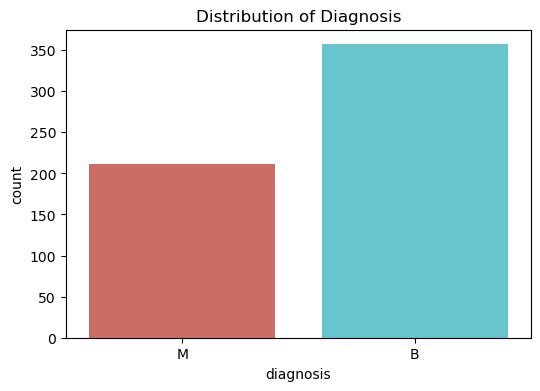

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


In [7]:
# 6) Target Variable Exploration
target_col = 'diagnosis'
if target_col in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=target_col, data=df, palette='hls')
    plt.title("Distribution of Diagnosis")
    plt.show()
    print(df[target_col].value_counts(normalize=True) * 100)
else:
    print(f"Target column '{target_col}' not found. Check column names.")

The dataset is imbalanced, with more benign cases than malignant ones. This can wrongly influence modeling. But on the other side, it reflects the reality that most breast tumors are non-cancerous. In summary, while benign tumors dominate the dataset, the malignant subset provides essential information for distinguishing high-risk cases.

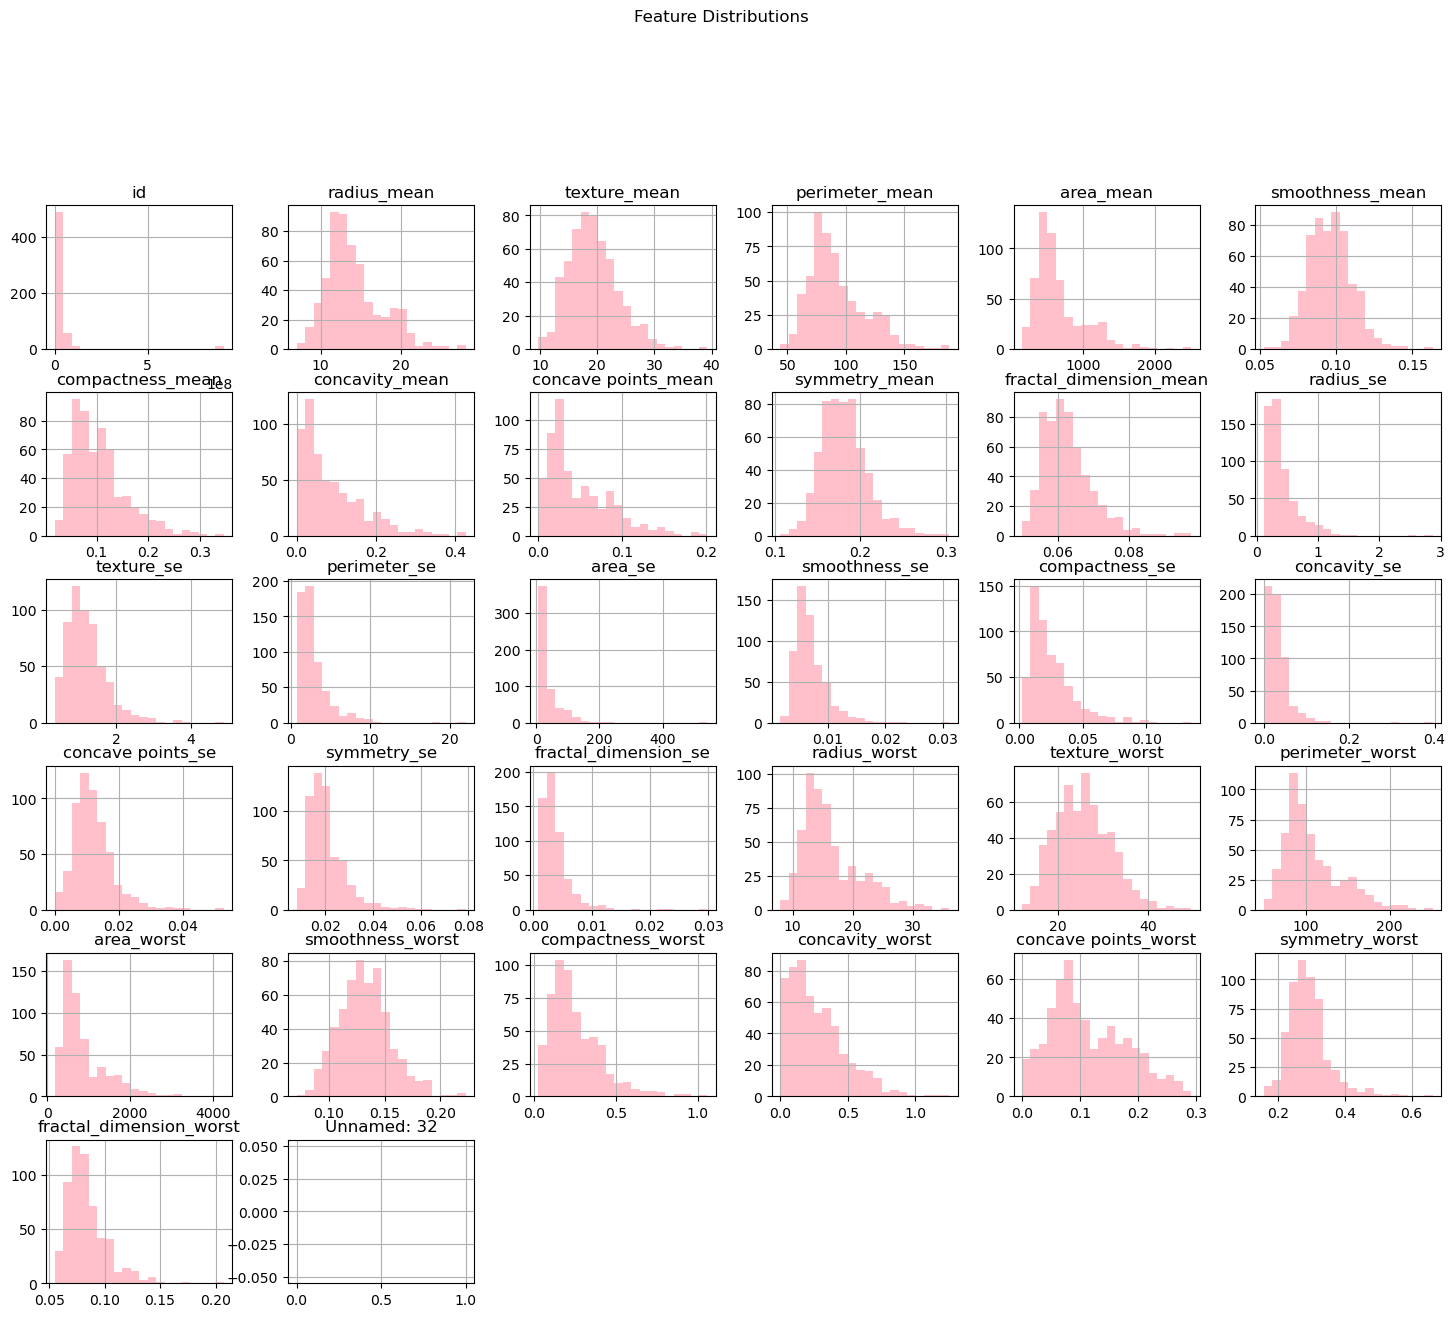

In [8]:
# 7) Feature Distributions
df.drop(columns=[target_col], errors='ignore').hist(bins=20, figsize=(18,14), color='pink')
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

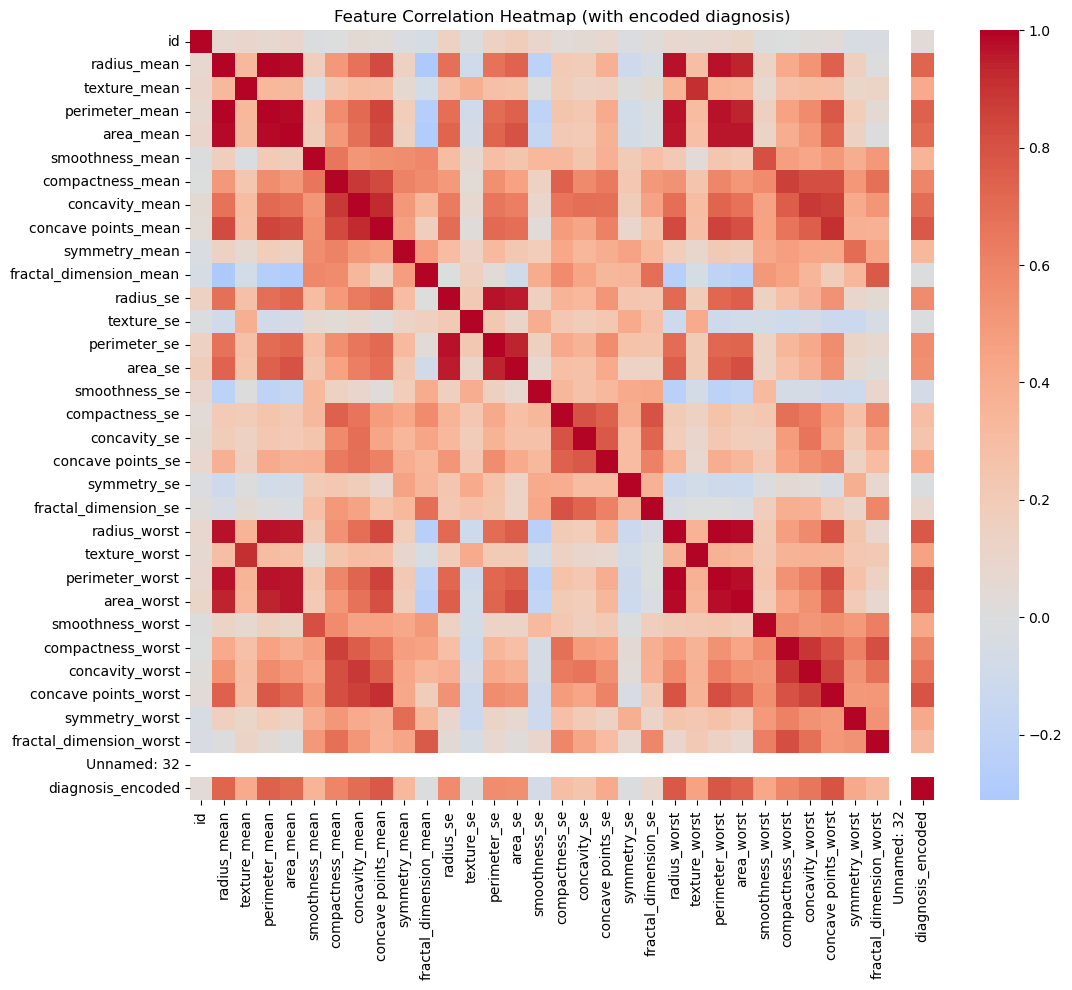

In [9]:
# 8) Correlation Analysis
# Encode target column for correlation
df['diagnosis_encoded'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Correlation heatmap including encoded diagnosis
plt.figure(figsize=(12,10))
sns.heatmap(df.drop(columns=['diagnosis'], errors='ignore').corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap (with encoded diagnosis)")
plt.show()

Top 10 features most correlated with malignant diagnosis:

concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis_encoded, dtype: float64


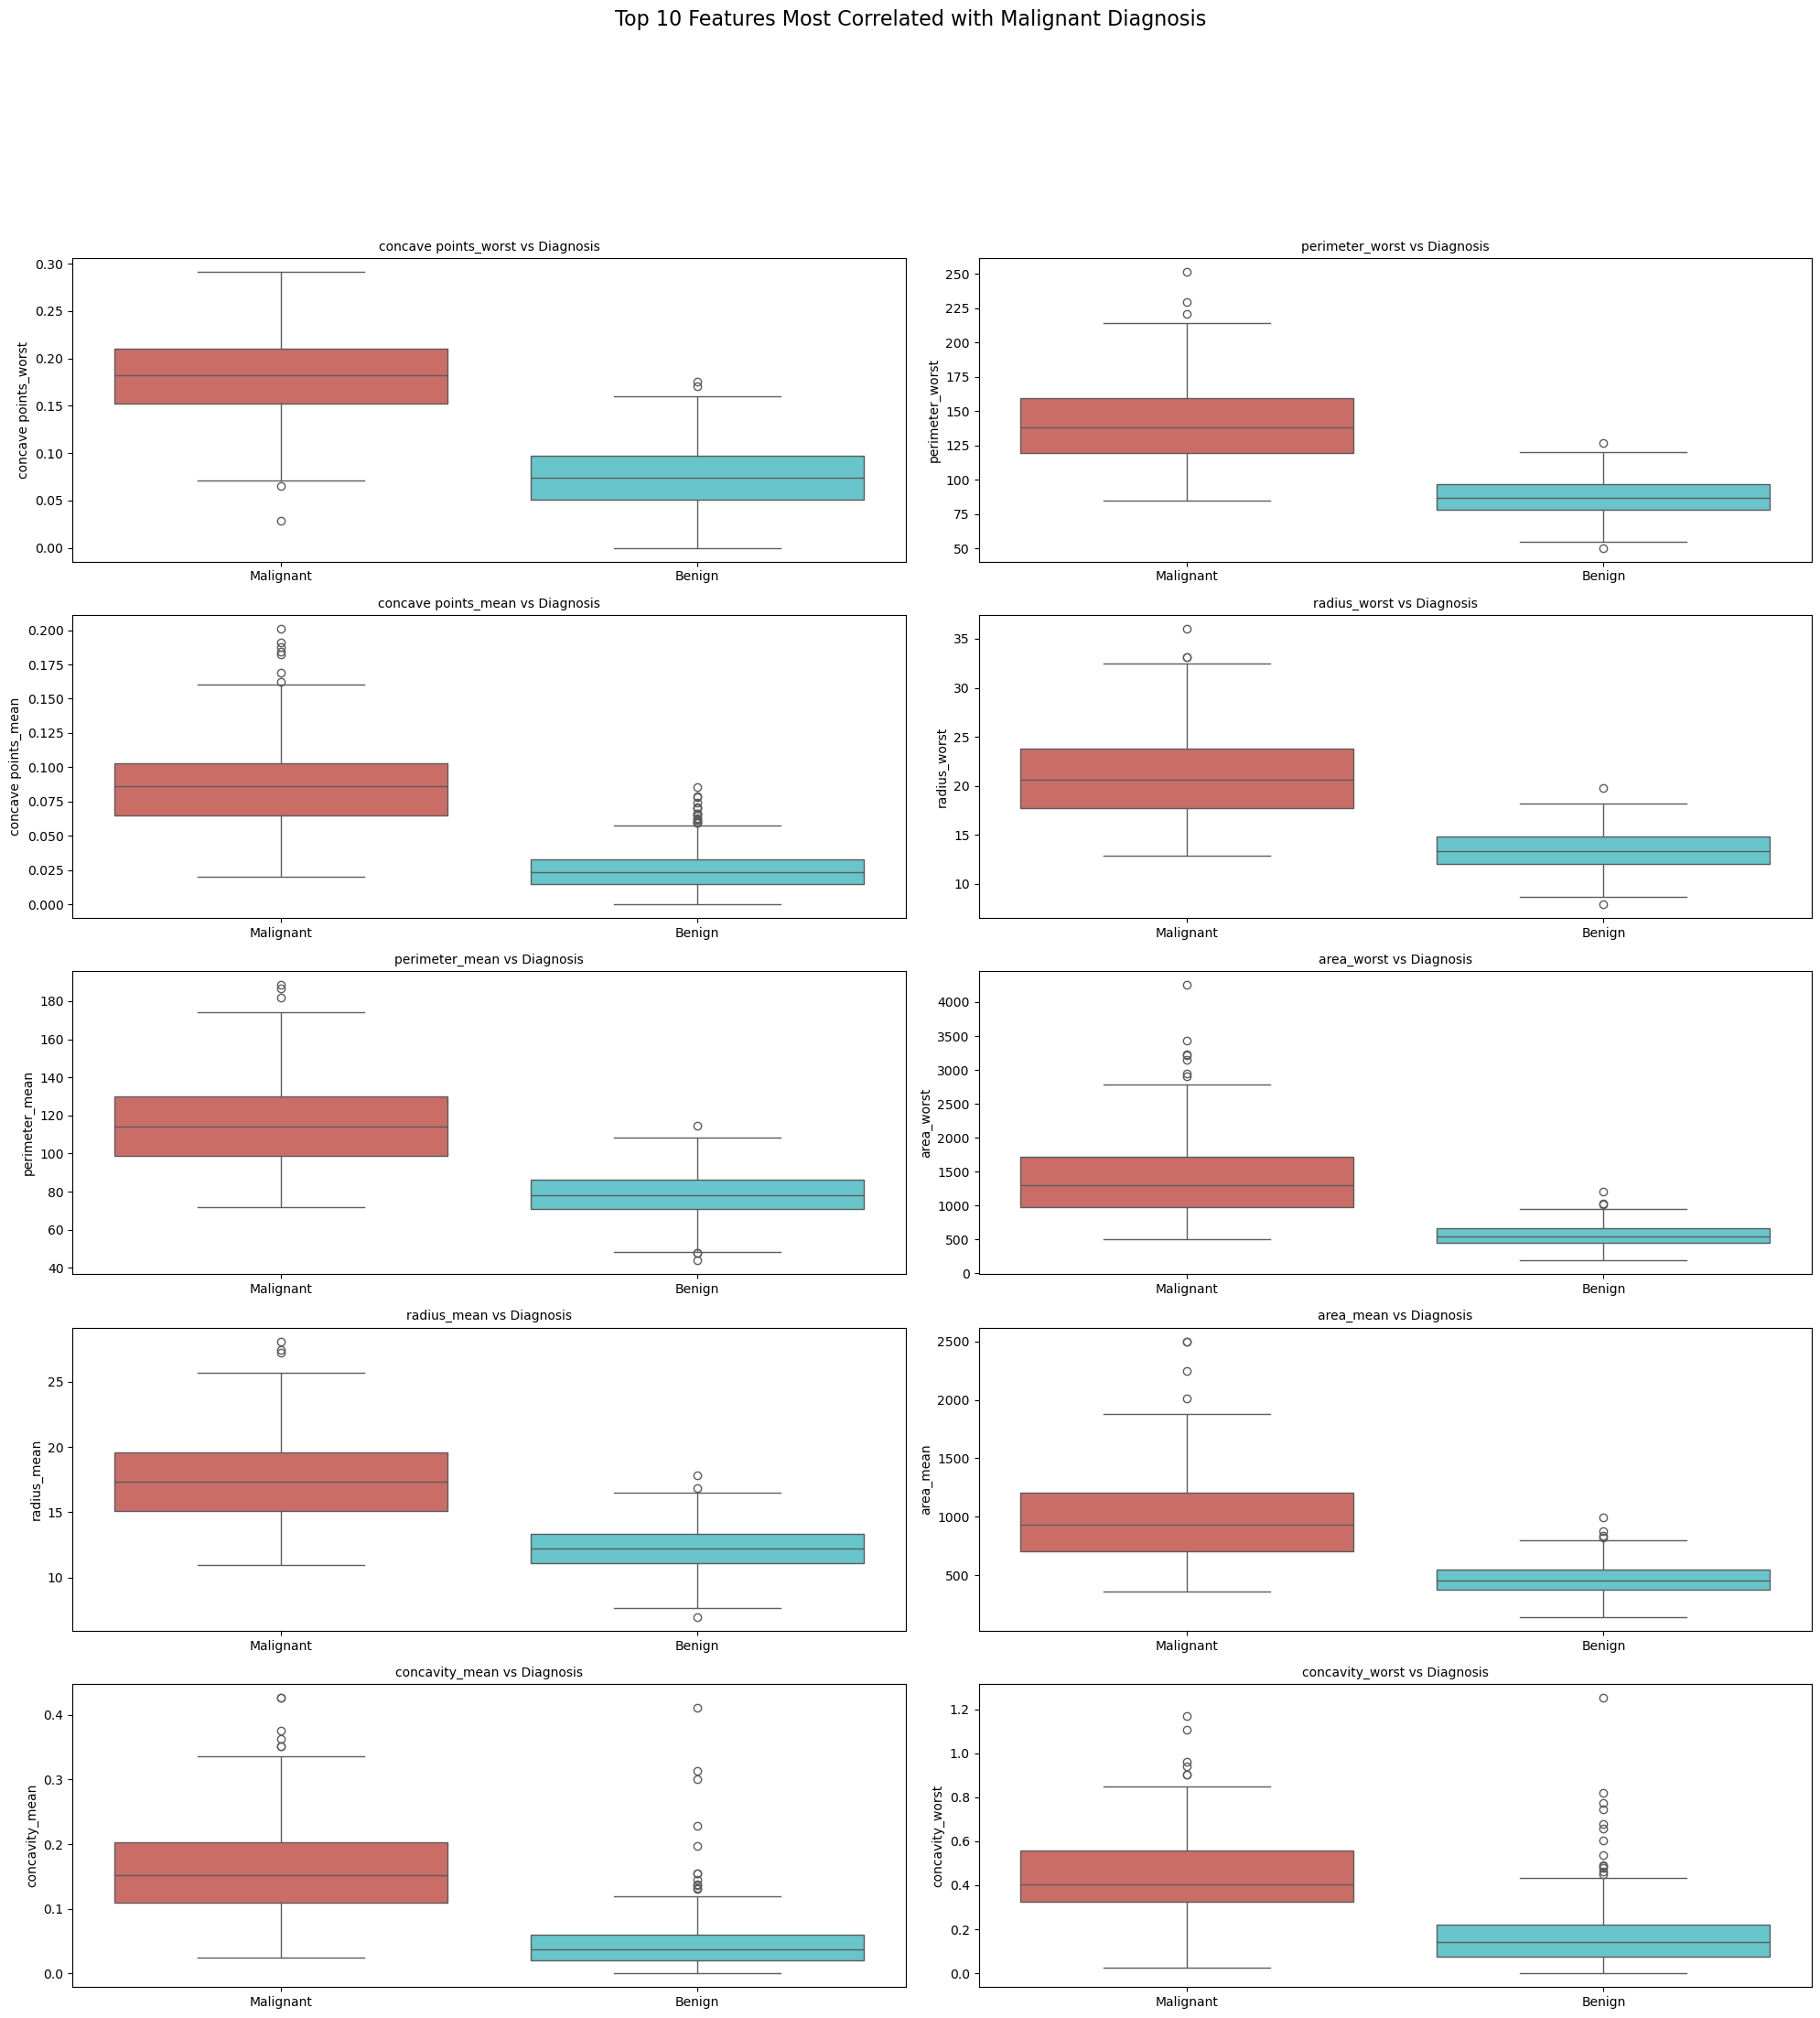

In [10]:
# Get correlation values with encoded diagnosis
target_corr = (
    df.select_dtypes(include=[np.number])
      .corr()['diagnosis_encoded']
      .drop('diagnosis_encoded')
      .sort_values(ascending=False)
)
# Display top 10 most correlated features
print("Top 10 features most correlated with malignant diagnosis:\n")
print(target_corr.head(10))

# Extract feature names
top_features = target_corr.head(10).index.tolist()

# Add a readable label column
df['label'] = df['diagnosis_encoded'].map({1: 'Malignant', 0: 'Benign'})

# Plot distributions of top 10 features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(top_features):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x='label', y=feature, data=df, palette='hls')
    plt.title(f"{feature} vs Diagnosis", fontsize=10)
    plt.xlabel("")
    plt.ylabel(feature)

plt.suptitle("Top 10 Features Most Correlated with Malignant Diagnosis", fontsize=16, y=1.10)
plt.tight_layout()
plt.show()

The correlation analysis highlights the top ten features most strongly associated with malignant tumors. The highest correlation is observed with concave points_worst (0.79), followed closely by perimeter_worst (0.78) and concave points_mean (0.78). This indicates that tumors with a greater number of concave points and larger perimeters are strongly linked to malignancy. Similarly, radius_worst (0.78) and perimeter_mean (0.74) reinforce the importance of tumor size and boundary irregularity as key diagnostic indicators.

Area-related features such as area_worst (0.73) and area_mean (0.71) also show strong positive correlations, suggesting that malignant tumors tend to occupy significantly larger regions compared to benign ones. Meanwhile, concavity_mean (0.70) and concavity_worst (0.66) emphasize that the degree of indentation in tumor shapes is another critical factor distinguishing malignant growths.

Overall, the pattern is clear: features capturing size (radius, perimeter, area) and irregularity (concavity, concave points) dominate the top correlations with malignancy. These findings suggest that these features will likely play a central role in predictive modeling and should be prioritized in feature selection and interpretability analyses.